In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel('Train_dataset.xlsx')


In [3]:
df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [4]:
df.shape

(787, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [6]:
df.isnull().sum().sort_values(ascending=False)

Popuation [2001]     492
Water Purity         158
Female Population    141
H Index              140
Foreign Visitors      90
Population [2011]     48
Toilets Avl           26
Median Age            18
Avg Temp              17
# of hospitals        15
Sex Ratio             10
SWM                    4
Covid Cases            0
Type                   0
State                  0
City                   0
dtype: int64

<AxesSubplot:>

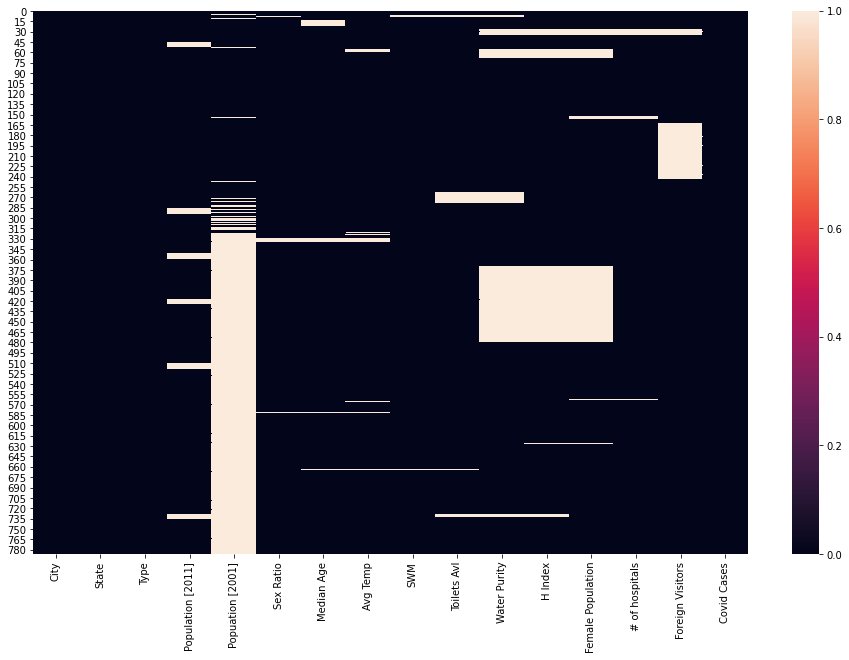

In [7]:
plt.figure(figsize = (16,10))

sns.heatmap(df.isnull())

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Popuation [2001],492,0.625159
Water Purity,158,0.200762
Female Population,141,0.179161
H Index,140,0.177891
Foreign Visitors,90,0.114358
Population [2011],48,0.060991
Toilets Avl,26,0.033037
Median Age,18,0.022872
Avg Temp,17,0.021601
# of hospitals,15,0.019060


<AxesSubplot:>

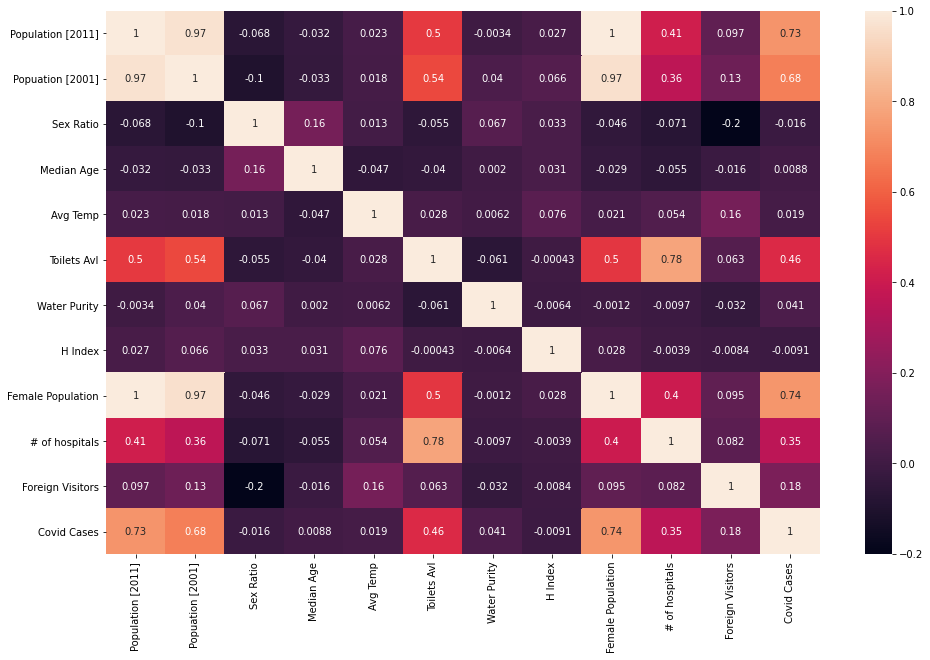

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [10]:
df["State"].unique()

array(['Maharashtra', 'Delhi', 'Karnataka', 'Telangana', 'Gujarat',
       'Tamil Nadu', 'Tamil nadu', 'West Bengal', 'Rajasthan',
       'Uttar Pradesh', 'Madhya Pradesh', 'Andhra Pradesh', 'Bihar',
       'Punjab', 'Jharkhand', 'Haryana', 'Jammu and Kashmir',
       'Chandigarh', 'Chhattisgarh', 'Assam', 'Odisha', 'Kerala',
       'Uttarakhand', 'Tripura', 'Puducherry', 'Mizoram', 'Manipur',
       'Himachal Pradesh', 'Sikkim', 'Andaman and Nicobar Islands', 'Goa',
       'Nagaland', 'Meghalaya'], dtype=object)

In [11]:
df.replace("Tamil nadu","Tamil Nadu",inplace=True)

In [12]:
df["State"].nunique()

32

In [13]:
for i in df.columns:
    print(i,"----"," No of unique values",df[i].nunique())

City ----  No of unique values 772
State ----  No of unique values 32
Type ----  No of unique values 37
Population [2011] ----  No of unique values 730
Popuation [2001] ----  No of unique values 292
Sex Ratio ----  No of unique values 160
Median Age ----  No of unique values 10
Avg Temp ----  No of unique values 26
SWM ----  No of unique values 3
Toilets Avl ----  No of unique values 107
Water Purity ----  No of unique values 101
H Index ----  No of unique values 647
Female Population ----  No of unique values 645
# of hospitals ----  No of unique values 76
Foreign Visitors ----  No of unique values 32
Covid Cases ----  No of unique values 642


In [14]:
df[['City',"State",'Population [2011]','Popuation [2001]']].groupby(["State"]).sum()

,Population [2011],Popuation [2001]
State,,
Andaman and Nicobar Islands,99984.0,0.0
Andhra Pradesh,11783135.0,5481826.0
Assam,1622588.0,1653150.0
Bihar,7625260.0,5128334.0
Chandigarh,1028667.0,808515.0
Chhattisgarh,1967221.0,1985237.0
Delhi,12349395.0,10951455.0
Goa,234547.0,0.0
Gujarat,17371940.0,10480216.0


In [15]:
l1=df[df['Popuation [2001]'].isnull()].index.tolist()
l2=df[df['Population [2011]'].isnull()].index.tolist()
set1=set(l1)
set2=set(l2)
drop=set1.intersection(set2)
df.drop(drop,axis=0,inplace=True)
df.reset_index()

,index,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,782,Lunawada,Gujarat,M,36954.0,NaN,846.0,23.0,28.0,MEDIUM,68.0,103.0,0.035280,31263.0,19.0,284973.0,1944
748,783,Murshidabad,West Bengal,M,36947.0,NaN,945.0,23.0,36.0,MEDIUM,62.0,136.0,0.056394,34915.0,22.0,1489500.0,2172
749,784,Mahe,Puducherry,M,36828.0,NaN,1019.0,28.0,28.0,HIGH,98.0,138.0,0.066752,37528.0,27.0,106153.0,2851
750,785,Lanka,Assam,M.B,36805.0,NaN,900.0,24.0,6.0,MEDIUM,63.0,145.0,0.627556,33125.0,15.0,24720.0,2158


In [16]:
df.reset_index()

,index,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,782,Lunawada,Gujarat,M,36954.0,NaN,846.0,23.0,28.0,MEDIUM,68.0,103.0,0.035280,31263.0,19.0,284973.0,1944
748,783,Murshidabad,West Bengal,M,36947.0,NaN,945.0,23.0,36.0,MEDIUM,62.0,136.0,0.056394,34915.0,22.0,1489500.0,2172
749,784,Mahe,Puducherry,M,36828.0,NaN,1019.0,28.0,28.0,HIGH,98.0,138.0,0.066752,37528.0,27.0,106153.0,2851
750,785,Lanka,Assam,M.B,36805.0,NaN,900.0,24.0,6.0,MEDIUM,63.0,145.0,0.627556,33125.0,15.0,24720.0,2158


In [17]:
df["Population [2011]"].isnull().sum()

13

In [18]:
df[['City',"State",'Population [2011]']].groupby(['City']).mean()

,Population [2011]
City,
Adoni,166537.0
Agartala,399688.0
Agra,1585704.0
Ahmedabad,5570585.0
Ahmednagar,350905.0
...,...
Yanam,55626.0
Yemmiganur,95149.0
Yevla,49826.0


In [19]:
l=df[df['Population [2011]'].isnull()].index.tolist()
print(l)

[46, 47, 48, 49, 50, 51, 52, 53, 287, 290, 291, 292, 294]


In [20]:
df.iloc[l]["City"]

46             Madurai
47              Raipur
48            Guwahati
49             Solapur
50       Hubli–Dharwad
51              Mysore
52     Tiruchirappalli
53            Bareilly
287            Hajipur
292              Dehri
294              Siwan
295            Bettiah
297           Tinsukia
Name: City, dtype: object

In [21]:
df["City"].iloc[np.where((df['City']=="Namakkal") )]

568    Namakkal
Name: City, dtype: object

In [22]:
a=df["City"].value_counts()
aa=pd.DataFrame(a)

In [23]:
aa.head(15)

,City
Ramnagar,3
Aurangabad,3
Tiruppur,2
Chennai,2
Indore,2
Kavali,2
Thrissur,2
Tinsukia,2
Phagwara,2
Jorhat,2


In [24]:
df[df["City"]=="Ramnagar"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
569,Ramnagar,Uttarakhand,N.P.P,54787.0,NaN,833.0,28.0,12.0,MEDIUM,97.0,158.0,0.434889,45638.0,24.0,105882.0,2330
668,Ramnagar,Uttarakhand,M.B,46205.0,NaN,839.0,24.0,5.0,LOW,89.0,193.0,0.578553,38766.0,26.0,105882.0,2012
754,Ramnagar,Bihar,N.A,38554.0,NaN,905.0,29.0,29.0,LOW,66.0,145.0,0.701768,34891.0,12.0,923737.0,2622


In [25]:
df[df["City"]=="Aurangabad"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
34,Aurangabad,Maharashtra,MPUA,1175116.0,873311.0,887.0,26.0,40.0,HIGH,139.0,NaN,NaN,NaN,NaN,NaN,3201
54,Aurangabad,Maharashtra,M.Cl,892483.0,NaN,877.0,28.0,30.0,MEDIUM,123.0,149.0,0.181617,782708.0,63.0,4408916.0,3201
321,Aurangabad,Bihar,C-1T,101520.0,79393.0,903.0,25.0,31.0,MEDIUM,122.0,130.0,0.430665,91673.0,60.0,923737.0,27667


In [26]:
df[df["City"]=="Chennai"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
5,Chennai,Tamil Nadu,MPUA,4681087.0,4343645.0,904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606
6,Chennai,Tamil Nadu,T,4646732.0,NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606


In [27]:
df[df["City"]=="Miryalaguda"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
309,Miryalaguda,Telangana,C-1T,109891.0,91395.0,937.0,23.0,35.0,MEDIUM,140.0,110.0,0.021,102968.0,54.0,126078.0,8612


In [28]:
df[df["City"]=="Phagwara"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
301,Phagwara,Punjab,M.Corp,122302.0,NaN,872.0,24.0,35.0,MEDIUM,128.0,194.0,0.496104,106647.0,100.0,242367.0,8363
305,Phagwara,Punjab,C-1T,117966.0,NaN,874.0,27.0,33.0,HIGH,139.0,178.0,0.386768,103102.0,62.0,242367.0,9430


In [29]:
df[df["City"]=="Thrissur"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
147,Thrissur,Kerala,C-1T,315596.0,317526.0,966.0,31.0,37.0,HIGH,118.0,126.0,0.216642,304866.0,62.0,977479.0,6235
506,Thrissur,Kerala,M,61632.0,NaN,967.0,32.0,30.0,HIGH,53.0,167.0,0.900663,59598.0,13.0,977479.0,3092


In [30]:
df[df["City"]=="Jorhat"]

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
280,Jorhat,Assam,C-1T,153889.0,112026.0,917.0,29.0,13.0,HIGH,112.0,131.0,0.941821,141116.0,81.0,24720.0,10627
432,Jorhat,Assam,MB,71782.0,NaN,916.0,27.0,5.0,HIGH,100.0,NaN,NaN,NaN,23.0,24720.0,2471


In [31]:
dic={}
cities2=[]

In [32]:
cities=['Adoni', 'Agartala', 'Agra', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Akot', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Alirajpur', 'Allahabad', 'Alwar', 'Amalapuram', 'Amalner', 'Amaravati', 'Ambala', 'Ambarnath', 'Ambattur', 'Ambejogai', 'Amravati', 'Amritsar', 'Amroha', 'Anakapalle', 'Anand', 'Anantapur', 'Angul', 'Anjangaon', 'Anjar', 'Ankleshwar', 'Arakkonam', 'Arambagh', 'Araria', 'Arrah', 'Arsikere', 'Aruppukkottai', 'Arvi', 'Arwal', 'Asansol', 'Ashok Nagar', 'Athni', 'Attili', 'Attingal', 'Aurangabad', 'Avadi', 'Bahraich', 'Balaghat', 'Balangir', 'Ballia', 'Bally', 'Bangalore', 'Bapatla', 'Baranagar', 'Barasat', 'Barauli', 'Barbigha', 'Barbil', 'Bardhaman', 'Bareilly', 'Bargarh', 'Barpeta', 'Bathinda', 'Begusarai', 'Belgaum', 'Bellampalle', 'Bellary', 'Berhampore', 'Berhampur', 'Bettiah', 'Bhabua', 'Bhadrachalam', 'Bhagalpur', 'Bhainsa', 'Bhalswa Jahangir Pur', 'Bharatpur', 'Bhatapara', 'Bhatpara', 'Bhavnagar', 'Bhawanipatna', 'Bheemunipatnam', 'Bhilai', 'Bhilwara', 'Bhimavaram', 'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhongir', 'Bhopal', 'Bhubaneswar', 'Bhusawal', 'Bidar', 'Bidhannagar', 'Bihar Sharif', 'Bijapur', 'Bikaner', 'Bilaspur', 'Bobbili', 'Bodhan', 'Bokaro', 'Bongaigaon', 'Bongaigaon\xa0City', 'Bulandshahr', 'Burhanpur', 'Buxar', 'Byasanagar', 'Chaibasa', 'Chalakudy', 'Challakere', 'Chandigarh', 'Chandrapur', 'Changanassery', 'Chapra', 'Charkhi Dadri', 'Chatra', 'Cherthala', 'Chidambaram', 'Chikkaballapur', 'Chinsurah', 'Chintamani', 'Chirala', 'Chirkunda', 'Chirmiri', 'Chittoor', 'Coimbatore', 'Cooch Behar', 'Cuttack', 'Dalli-Rajhara', 'Danapur', 'Darbhanga', 'Davanagere', 'Dehradun', 'Dehri', 'Delhi', 'Deoghar', 'Dewas', 'Dhamtari', 'Dhanbad', 'Dharmavaram', 'Dhenkanal', 'Dhone', 'Dhoraji', 'Dhubri', 'Dhule', 'Dhuri', 'Dibrugarh', 'Dindigul', 'Diphu', 'Dumka', 'Dumraon', 'Durg', 'Durgapur', 'Eluru', 'Erode', 'Etawah', 'Faridabad', 'Faridkot', 'Farooqnagar', 'Farrukhabad', 'Fatehabad', 'Fatehpur', 'Fazilka', 'Firozabad', 'Firozpur Cantt.', 'Forbesganj', 'Gadwal', 'Gandhidham', 'Gandhinagar', 'Gangarampur', 'Gangtok', 'Gaya', 'Ghaziabad', 'Giridih', 'Goalpara', 'Gobichettipalayam', 'Gobindgarh', 'Gohana', 'Gokak', 'Golaghat', 'Gooty', 'Gopalganj', 'Gopalpur', 'Gorakhpur', 'Gowribidanur', 'Gudivada', 'Gudur', 'Gulbarga', 'Gumia', 'Guna', 'Guntakal', 'Guntur', 'Gunupur', 'Gurdaspur', 'Gurgaon', 'Guwahati', 'Gwalior', 'Hajipur', 'Haldia', 'Hansi', 'Hapur', 'Haridwar', 'Hazaribagh', 'Hindupur', 'Hisar', 'Hospet', 'Hosur', 'Howrah', 'Hubli–Dharwad', 'Hyderabad', 'Ichalkaranji', 'Imphal', 'Itarsi', 'Jabalpur', 'Jaggaiahpet', 'Jagraon', 'Jagtial', 'Jaipur', 'Jalandhar', 'Jalandhar Cantt.', 'Jalgaon', 'Jalna', 'Jamalpur', 'Jammalamadugu', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jamui', 'Jangaon', 'Jaspur', 'Jatani', 'Jaunpur', 'Jehanabad', 'Jhansi', 'Jhargram', 'Jharsuguda', 'Jhumri Tilaiya', 'Jodhpur', 'Junagadh', 'Kadapa', 'Kadi', 'Kadiri', 'Kagaznagar', 'Kakinada', 'Kalimpong', 'Kallakurichi', 'Kalpi', 'Kalyan-Dombivli', 'Kamareddy', 'Kamarhati', 'Kandukur', 'Kanhangad', 'Kanigiri', 'Kannur', 'Kanpur', 'Kapadvanj', 'Karaikal', 'Karaikudi', 'Karawal Nagar', 'Karimganj', 'Karimnagar', 'Karnal', 'Karunagappally', 'Karur', 'Kasaragod', 'Kathua', 'Katihar', 'Katni', 'Kayamkulam', 'Kendrapara', 'Kendujhar', 'Keshod', 'Khairthal', 'Khambhat', 'Khammam', 'Khandwa', 'Kharagpur', 'Kharar', 'Khora, Ghaziabad', 'Kichha', 'Kirari Suleman Nagar', 'Kishanganj', 'Kochi', 'Kohima', 'Kolhapur', 'Kolkata', 'Kollam', 'Koratla', 'Korba', 'Kot Kapura', 'Kota', 'Kothagudem', 'Kovvur', 'Koyilandy', 'Kozhikode', 'Kulti', 'Kumbakonam', 'Kunnamkulam', 'Kurnool', 'Lachhmangarh', 'Ladnu', 'Laharpur', 'Lakhisarai', 'Lalganj', 'Lanka', 'Latur', 'Limbdi', 'Lonavla', 'Loni', 'Lucknow', 'Ludhiana', 'Lunawada', 'Lunglei', 'Macherla', 'Machilipatnam', 'Madanapalle', 'Madhepura', 'Madhubani', 'Madhupur', 'Madhyamgram', 'Madurai', 'Mahasamund', 'Mahbubnagar', 'Mahe', 'Maheshtala', 'Mahnar Bazar', 'Makrana', 'Malda', 'Malegaon', 'Malkapur', 'Malout', 'Mandamarri', 'Mandapeta', 'Mandi Dabwali', 'Mandideep', 'Mandla', 'Mandvi', 'Mangalore', 'Manglaur', 'Mango', 'Mangrol', 'Manjlegaon', 'Manmad', 'Mansa', 'Manvi', 'Mapusa', 'Margao', 'Markapur', 'Masaurhi', 'Mathura', 'Mattannur', 'Mau', 'Medak', 'Medininagar', 'Medininagar (Daltonganj)', 'Medinipur', 'Meerut', 'Mehkar', 'Mehsana', 'Merta City', 'Mhow\xa0Cantonment', 'Mira-Bhayandar', 'Mirzapur', 'Modasa', 'Mokameh', 'Moradabad', 'Morbi', 'Morena', 'Motihari', 'Mudhol', 'Muktsar', 'Mulbagal', 'Mumbai', 'Munger', 'Murshidabad', 'Murtijapur', 'Muzaffarnagar', 'Muzaffarpur', 'Mysore', 'Nabha', 'Nadiad', 'Nagaon', 'Nagari', 'Nagercoil', 'Nagina', 'Nagpur', 'Naidupet', 'Naihati', 'Naila Janjgir', 'Nainital', 'Najibabad', 'Nakodar', 'Namakkal', 'Nanded', 'Nandivaram-Guduvancheri', 'Nandura', 'Nandyal', 'Nangal', 'Nangloi Jat', 'Nanjangud', 'Nanpara', 'Narasapuram', 'Narasaraopet', 'Narayanpet', 'Narkatiaganj', 'Narnaul', 'Narwana', 'Nashik', 'Nasirabad', 'Nathdwara', 'Naugachhia', 'Navi Mumbai', 'Nawabganj', 'Nawada', 'Nawanshahr', 'Nedumangad', 'Nehtaur', 'Nelamangala', 'Nellikuppam', 'Nellore', 'New Delhi', 'Neyyattinkara', 'Nidadavole', 'Nilambur', 'Nimbahera', 'Nirmal', 'Nizamabad', 'Nohar', 'Noida', 'Nokha', 'Noorpur', 'North Dumdum', 'North Lakhimpur', 'Nowgong', 'Nuzvid', 'Ongole', 'Orai', 'Ottappalam', 'Ozar', 'Ozhukarai', 'Pachora', 'Padra', 'Padrauna', 'Palani', 'Palasa Kasibugga', 'Palghar', 'Pali', 'Palitana', 'Pallavaram', 'Palwancha', 'Panaji', 'Panchkula', 'Pandharpur', 'Pandhurna', 'Panihati', 'Panipat', 'Panna', 'Panruti', 'Panvel', 'Paradip', 'Paramakudi', 'Paravoor', 'Parbhani', 'Parlakhemundi', 'Parli', 'Parvathipuram', 'Pathanamthitta', 'Patiala', 'Patna', 'Pattamundai', 'Pattukkottai', 'Peddapuram', 'Perambalur', 'Peringathur', 'Perinthalmanna', 'Periyakulam', 'Pernampattu', 'Petlad', 'Phalodi', 'Phaltan', 'Phusro', 'Pilani', 'Piler', 'Pilkhuwa', 'Pimpri-Chinchwad', 'Pithampur', 'Pithapuram', 'Pithoragarh', 'Pondicherry', 'Ponnani', 'Ponnur', 'Poonch', 'Port Blair', 'Proddatur', 'Puliyankudi', 'Punalur', 'Pune', 'Punganur', 'Puranpur', 'Purnia', 'Pusad', 'Puttur', 'Rabkavi Banhatti', 'Raebareli', 'Raghogarh-Vijaypur', 'Raichur', 'Raiganj', 'Raipur', 'Rairangpur', 'Rajagangapur', 'Rajahmundry', 'Rajauri', 'Rajgarh (Churu)', 'Rajkot', 'Rajpur Sonarpur', 'Rajpura', 'Rajsamand', 'Ramachandrapuram', 'Ramagundam', 'Ramanagaram', 'Ramanathapuram', 'Rameshwaram', 'Ramgarh', 'Ramnagar', 'Rampur', 'Rampura Phul', 'Rampurhat', 'Ranchi', 'Ranibennur', 'Rasipuram', 'Ratangarh', 'Rath', 'Ratlam', 'Ratnagiri', 'Raurkela Industrial Township', 'Raxaul Bazar', 'Rayachoti', 'Rayadurg', 'Rayagada', 'Renukoot', 'Repalle', 'Rewa', 'Rishikesh', 'Rohtak', 'Rourkela', 'Rudauli', 'Rupnagar', 'Sagar', 'Sagara', 'Saharanpur', 'Saharsa', 'Sahaswan', 'Sahibganj', 'Sailu', 'Sainthia', 'Salem', 'Salur', 'Samalkot', 'Samana', 'Samastipur', 'Sambalpur', 'Sambhal', 'Sandila', 'Sangamner', 'Sangareddy', 'Sangli-Miraj & Kupwad', 'Sangrur', 'Sankarankovil', 'Sardarshahar', 'Sardhana', 'Sarni', 'Sasaram', 'Satara', 'Satna', 'Sattenapalle', 'Saunda', 'Saundatti-Yellamma', 'Savarkundla', 'Secunderabad', 'Sehore', 'Sendhwa', 'Seohara', 'Seoni', 'Serampore', 'Shahabad', 'Shahabad, Hardoi', 'Shahade', 'Shahbad', 'Shahdol', 'Shahjahanpur', 'Shahpur', 'Shajapur', 'Shamli', 'Shegaon', 'Sheikhpura', 'Sheopur', 'Sherkot', 'Shikohabad', 'Shimla', 'Shimoga', 'Shirpur-Warwade', 'Shivpuri', 'Shoranur', 'Shrirampur', 'Shujalpur', 'Siana', 'Sibsagar', 'Siddipet', 'Sidhi', 'Sidhpur', 'Sidlaghatta', 'Sihor', 'Sihora', 'Sikandra Rao', 'Sikandrabad', 'Sikar', 'Silchar', 'Siliguri', 'Sillod', 'Sindhnur', 'Singrauli', 'Sira', 'Sircilla', 'Sirhind Fatehgarh Sahib', 'Sironj', 'Sirsa', 'Sirsi', 'Siruguppa', 'Sitamarhi', 'Sivaganga', 'Siwan', 'Sojat', 'Solapur', 'Sonipat', 'Sopore', 'South Dumdum', 'Sri Ganganagar', 'Sri Madhopur', 'Srikakulam', 'Srikalahasti', 'Srinagar', 'Srivilliputhur', 'Sujangarh', 'Sullurpeta', 'Sultan Pur Majra', 'Sultanganj', 'Sunabeda', 'Sunam', 'Sundargarh', 'Supaul', 'Surapura', 'Surat', 'Suratgarh', 'Surendranagar Dudhrej', 'Suri', 'Suryapet', 'Tadepalligudem', 'Tadipatri', 'Taki', 'Talcher', 'Talegaon Dabhade', 'Taliparamba', 'Tamluk', 'Tanda', 'Tandur', 'Tanuku', 'Tarn Taran', 'Tasgaon', 'Tenali', 'Tenkasi', 'Thakurdwara', 'Thane', 'Thangadh', 'Thanjavur', 'Theni Allinagaram', 'Thirumangalam', 'Thiruvalla', 'Thiruvallur', 'Thiruvananthapuram', 'Thiruvarur', 'Thodupuzha', 'Thoothukudi', 'Thoubal', 'Thrippunithura', 'Tikamgarh', 'Tilhar', 'Tindivanam', 'Tiptur', 'Tiruchengode', 'Tiruchirappalli', 'Tirunelveli', 'Tirupathur', 'Tirupati', 'Tirur', 'Tiruttani', 'Tiruvethipuram', 'Tiruvottiyur', 'Tiruvuru', 'Tohana', 'Tumkur', 'Tumsar', 'Tundla', 'Tuni', 'Tura', 'Udaipur', 'Udhagamandalam', 'Udumalaipettai', 'Udupi', 'Ujhani', 'Ujjain', 'Ulhasnagar', 'Uluberia', 'Umarkhed', 'Umred', 'Una', 'Unjha', 'Unnao', 'Upleta', 'Uran Islampur', 'Vadalur', 'Vadodara', 'Vaijapur', 'Valparai', 'Vaniyambadi', 'Varanasi', 'Varkala', 'Vasai-Virar', 'Vatakara', 'Vellakoil', 'Vellore', 'Venkatagiri', 'Vijayanagaram', 'Vijayawada', 'Vikarabad', 'Vikramasingapuram', 'Viluppuram', 'Vinukonda', 'Viramgam', 'Virudhachalam', 'Virudhunagar', 'Visakhapatnam', 'Visnagar', 'Vita', 'Vrindavan', 'Vyara', 'Wadgaon Road', 'Wadhwan', 'Wadi', 'Wanaparthy', 'Wani', 'Wankaner', 'Warangal', 'Warora', 'Washim', 'Yadgir', 'Yamunanagar', 'Yanam', 'Yemmiganur', 'Yevla', 'Zirakpur', 'Zunheboto']

In [33]:
for i in range(len(df)): 
    city_name=df.iat[i,0]
    pop=df.iat[i,3]
    
    if(pd.isnull(df.iloc[i,3])):
        continue
    else:
        pass
        
    if city_name in cities:
        if city_name not in cities2:
            cities2.append(city_name)
            dic[city_name]=pop
            
       
        
        
    

In [34]:
dic

{'Mumbai': 12442373.0,
 'Delhi': 11007835.0,
 'Bangalore': 8436675.0,
 'Hyderabad': 6809970.0,
 'Kolkata': 4486679.0,
 'Surat': 4467797.0,
 'Pune': 3124458.0,
 'Jaipur': 3046163.0,
 'Lucknow': 2817105.0,
 'Kanpur': 2765348.0,
 'Nagpur': 2405665.0,
 'Thane': 1841488.0,
 'Bhopal': 1798218.0,
 'Visakhapatnam': 1728128.0,
 'Pimpri-Chinchwad': 1727692.0,
 'Patna': 1684222.0,
 'Vadodara': 1670806.0,
 'Ghaziabad': 1648643.0,
 'Ludhiana': 1618879.0,
 'Agra': 1585704.0,
 'Nashik': 1486053.0,
 'Ranchi': 1456528.0,
 'Faridabad': 1414050.0,
 'Meerut': 1305429.0,
 'Rajkot': 1286678.0,
 'Kalyan-Dombivli': 1247327.0,
 'Vasai-Virar': 1222390.0,
 'Varanasi': 1201815.0,
 'Srinagar': 1180570.0,
 'Aurangabad': 1175116.0,
 'Dhanbad': 1162472.0,
 'Amritsar': 1132383.0,
 'Navi Mumbai': 1120547.0,
 'Allahabad': 1112544.0,
 'Howrah': 1077075.0,
 'Gwalior': 1069276.0,
 'Jabalpur': 1055525.0,
 'Coimbatore': 1050721.0,
 'Vijayawada': 1034358.0,
 'Jodhpur': 1033918.0,
 'Chandigarh': 1028667.0,
 'Aligarh': 889810.0

In [35]:
# dic["Madurai"]=1017865
# dic["Raipur"]=1027264
# dic["Guwahati"]=962334
# dic["Solapur"]=4317756
# dic["Hubli–Dharwad"]=1847023
# dic["Mysore"]=

In [36]:
no_pop=[]
for i in range(len(df)): 
    city_name=df.iat[i,0]
    pop=df.iat[i,3]
    if pd.isnull(df.iloc[i,3]):
        if city_name in cities2:
            pop2=dic[city_name]
            print(city_name,pop2)
        else:
            no_pop.append(city_name)
            

In [37]:
no_pop

['Madurai',
 'Raipur',
 'Guwahati',
 'Solapur',
 'Hubli–Dharwad',
 'Mysore',
 'Tiruchirappalli',
 'Bareilly',
 'Hajipur',
 'Kumbakonam',
 'Bongaigaon',
 'Dehri',
 'Siwan']

In [38]:
df["Population [2011]"].describe()

count    7.390000e+02
mean     3.102834e+05
std      8.874849e+05
min      3.677600e+04
25%      5.255000e+04
50%      7.910600e+04
75%      2.374765e+05
max      1.244237e+07
Name: Population [2011], dtype: float64

In [39]:
len(no_pop)
df["Population [2011]"].isnull().sum()

13

In [40]:
dfp=pd.read_excel("mCities_pop.xlsx")
dfp

,STATE CODE,DISTRICT CODE,INDIA/STATE/UT/DISTRICT,TRU,Persons,Males,Females
0,1,0,JAMMU & KASHMIR,Total,12548926.0,6665561,5883365.0
1,1,0,JAMMU & KASHMIR,Rural,9134820.0,4809619,4325201.0
2,1,0,JAMMU & KASHMIR,Urban,3414106.0,1855942,1558164.0
3,1,1,Kupwara,Total,875564.0,475126,400438.0
4,1,1,Kupwara,Rural,776322.0,418370,357952.0
...,...,...,...,...,...,...,...
2020,35,2,North & Middle Andaman,Rural,102798.0,53416,49382.0
2021,35,2,North & Middle Andaman,Urban,2741.0,1405,1336.0
2022,35,3,South Andaman,Total,237586.0,126804,110782.0
2023,35,3,South Andaman,Rural,104794.0,56526,48268.0


In [41]:
df_need=dfp[["INDIA/STATE/UT/DISTRICT","Persons"]]

In [42]:
df_need

,INDIA/STATE/UT/DISTRICT,Persons
0,JAMMU & KASHMIR,12548926.0
1,JAMMU & KASHMIR,9134820.0
2,JAMMU & KASHMIR,3414106.0
3,Kupwara,875564.0
4,Kupwara,776322.0
...,...,...
2020,North & Middle Andaman,102798.0
2021,North & Middle Andaman,2741.0
2022,South Andaman,237586.0
2023,South Andaman,104794.0


In [43]:
len(dic)

713

In [44]:
dic2={}

In [45]:
for i in range(len(df_need)):
    city_name=df_need.iat[i,0]
    if city_name in no_pop:
        pop2=df_need.iat[i,1]
        dic2[city_name]=pop2


In [46]:
dic2

{'Bareilly': 1562495.0,
 'Siwan': 182311.0,
 'Bongaigaon': 100826.0,
 'Raipur': 1482227.0,
 'Solapur': 1398439.0,
 'Mysore': 1238332.0,
 'Tiruchirappalli': 1336849.0,
 'Madurai': 1844209.0}

In [47]:
for i in range(len(df)): 
    city_name=df.iat[i,0]
    pop=df.iat[i,3]
    if pd.isnull(df.iloc[i,3]):
        if city_name in dic2:
            df.iat[i,3]=dic2[city_name]
                        

In [48]:
df.reset_index(inplace=True)

In [49]:
df["Population [2011]"].isnull().sum()

5

In [50]:
l=df[df['Population [2011]'].isnull()].index.tolist()
l

[48, 50, 287, 288, 290]

In [51]:
df.iloc[l]

,index,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
48,48,Guwahati,Assam,C-1T,NaN,809895.0,887.0,29.0,5.0,LOW,102.0,141.0,0.168741,849171.0,50.0,24720.0,10280
50,50,Hubli–Dharwad,Karnataka,C-1T,NaN,786195.0,940.0,29.0,32.0,MEDIUM,117.0,153.0,0.675204,887161.0,86.0,636502.0,10895
287,287,Hajipur,Bihar,C-1T,NaN,119412.0,926.0,27.0,25.0,LOW,124.0,133.0,0.497846,136239.0,96.0,923737.0,9991
288,290,Kumbakonam,Tamil Nadu,C-1T,NaN,144021.0,919.0,28.0,28.0,LOW,134.0,133.0,0.678858,128711.0,88.0,4684707.0,10283
290,292,Dehri,Bihar,C-1T,NaN,119057.0,907.0,25.0,31.0,HIGH,112.0,102.0,0.888308,124321.0,83.0,923737.0,9061


In [52]:
df.iat[48,4]=962334

In [53]:
df.iat[50,4]=1847023

In [54]:
df.iat[287,4]=147688

In [55]:
df.iat[290,4]=137231

In [56]:
df.iat[292,4]=132209

In [57]:
df.head()

,index,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [58]:
l1=df[df['Population [2011]'].isnull()].index.tolist()

In [59]:
df.iloc[l1]

,index,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
288,290,Kumbakonam,Tamil Nadu,C-1T,NaN,144021.0,919.0,28.0,28.0,LOW,134.0,133.0,0.678858,128711.0,88.0,4684707.0,10283


In [60]:
df.iat[288,4]=140156

In [61]:
l1=df[df['Population [2011]'].isnull()].index.tolist()

In [62]:
df.drop("index",axis=1,inplace=True)

In [63]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Popuation [2001]     457
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           21
Water Purity         146
H Index              128
Female Population    134
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [64]:
df.drop("Popuation [2001]",axis=1,inplace=True)

In [65]:
s1=df[df['Sex Ratio'].isnull()].index.tolist()

In [66]:
df.iloc[s1]

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
8,Surat,Gujarat,MPUA,4467797.0,NaN,27.0,26.0,NaN,NaN,NaN,0.809334,3797627.0,98.0,284973.0,23432
9,Pune,Maharashtra,MPUA,3124458.0,NaN,29.0,29.0,NaN,NaN,NaN,0.445902,2743274.0,50.0,4408916.0,218502
327,Balangir,Odisha,M,98238.0,NaN,NaN,NaN,MEDIUM,99.0,108.0,0.852493,93031.0,27.0,66971.0,2676
328,Nawada,Bihar,N.Pd,98029.0,NaN,NaN,NaN,MEDIUM,75.0,172.0,0.769373,89402.0,20.0,923737.0,2551
329,Jharsuguda,Odisha,M,97730.0,NaN,NaN,NaN,HIGH,56.0,153.0,0.480670,92844.0,14.0,66971.0,2276
330,Gadwal,Telangana,M,96877.0,NaN,NaN,NaN,MEDIUM,92.0,131.0,0.251362,89805.0,30.0,126078.0,2686
331,Jagtial,Telangana,M,96470.0,NaN,NaN,NaN,HIGH,70.0,143.0,0.652642,89910.0,13.0,126078.0,2797
332,Viluppuram,Tamil Nadu,M,96253.0,NaN,NaN,NaN,LOW,87.0,116.0,0.424914,88264.0,30.0,4684707.0,8990
555,Jaggaiahpet,Andhra Pradesh,M,53530.0,NaN,NaN,NaN,MEDIUM,88.0,121.0,0.018630,47213.0,19.0,237854.0,2203
556,Goalpara,Assam,M.B,53430.0,NaN,NaN,NaN,MEDIUM,62.0,121.0,0.408911,48408.0,10.0,24720.0,2172


In [67]:
df.iat[8,4]=788

In [68]:
df.iat[9,4]=915

In [69]:
df.iat[327,4]=992

In [70]:
df.iat[328,4]=939

In [71]:
df.iat[329,4]=1057

In [72]:
df.iat[330,4]=972

In [73]:
df.iat[331,4]=1005

In [74]:
df.iat[332,4]=987

In [75]:
df.iat[555,4]=1021

In [76]:
df.iat[556,4]=964

In [77]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           21
Water Purity         146
H Index              128
Female Population    134
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [78]:
med=df["Toilets Avl"].mean()
med

96.73871409028727

In [79]:
med2=df["Median Age"].median()
med3=df["Avg Temp"].median()
print(med2,"\n",med3)

26.0 
 31.0


In [80]:
df["Toilets Avl"].fillna(int(med),inplace=True)

In [81]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl            0
Water Purity         146
H Index              128
Female Population    134
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [82]:
df["Median Age"].fillna(med2,inplace=True)
df["Avg Temp"].fillna(med3,inplace=True)

In [83]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    4
Toilets Avl            0
Water Purity         146
H Index              128
Female Population    134
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [84]:
med4=df["# of hospitals"].mean()
print(med4)

42.73405698778833


In [85]:
df["# of hospitals"].fillna(int(med4),inplace=True)

In [86]:
med5=df["Foreign Visitors"].mean()
print(med5)

1474969.0151057402


In [87]:
df["Foreign Visitors"].fillna(int(med5),inplace=True)

In [88]:
df['SWM']=df['SWM'].fillna(df['SWM'].mode()[0])


In [89]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity         146
H Index              128
Female Population    134
# of hospitals         0
Foreign Visitors       0
Covid Cases            0
dtype: int64

In [90]:
for i in range(len(df)): 
    
    if pd.isnull(df.iloc[i,11]):
        fem_pop=(df.iloc[i,3]/1000)*(df.iloc[i,4])
        df.iat[i,11]=fem_pop

In [91]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity         146
H Index              128
Female Population      0
# of hospitals         0
Foreign Visitors       0
Covid Cases            0
dtype: int64

In [92]:
df["H Index"].fillna(df["H Index"].mean(),inplace=True)
df["Water Purity"].fillna(df["Water Purity"].mean(),inplace=True)

In [93]:
df.isnull().sum()

City                 0
State                0
Type                 0
Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

In [94]:
df.head()

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


<AxesSubplot:xlabel='SWM', ylabel='count'>

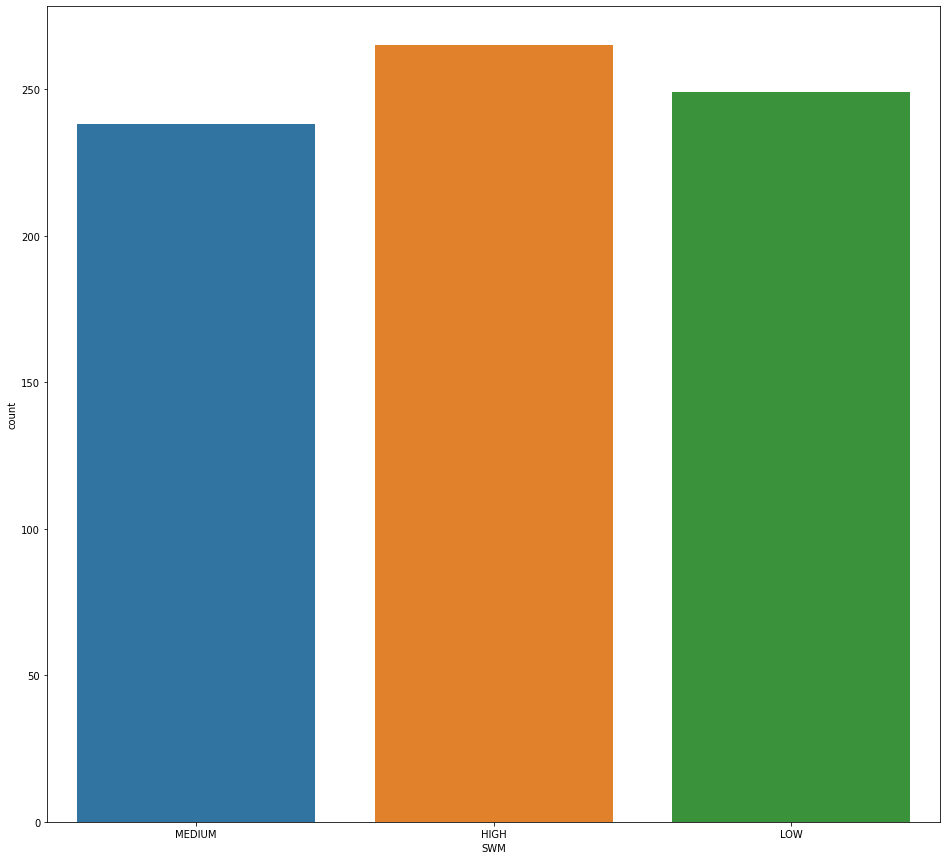

In [95]:
plt.figure(figsize = (16,15))

sns.countplot(df["SWM"])

<AxesSubplot:xlabel='City', ylabel='Covid Cases'>

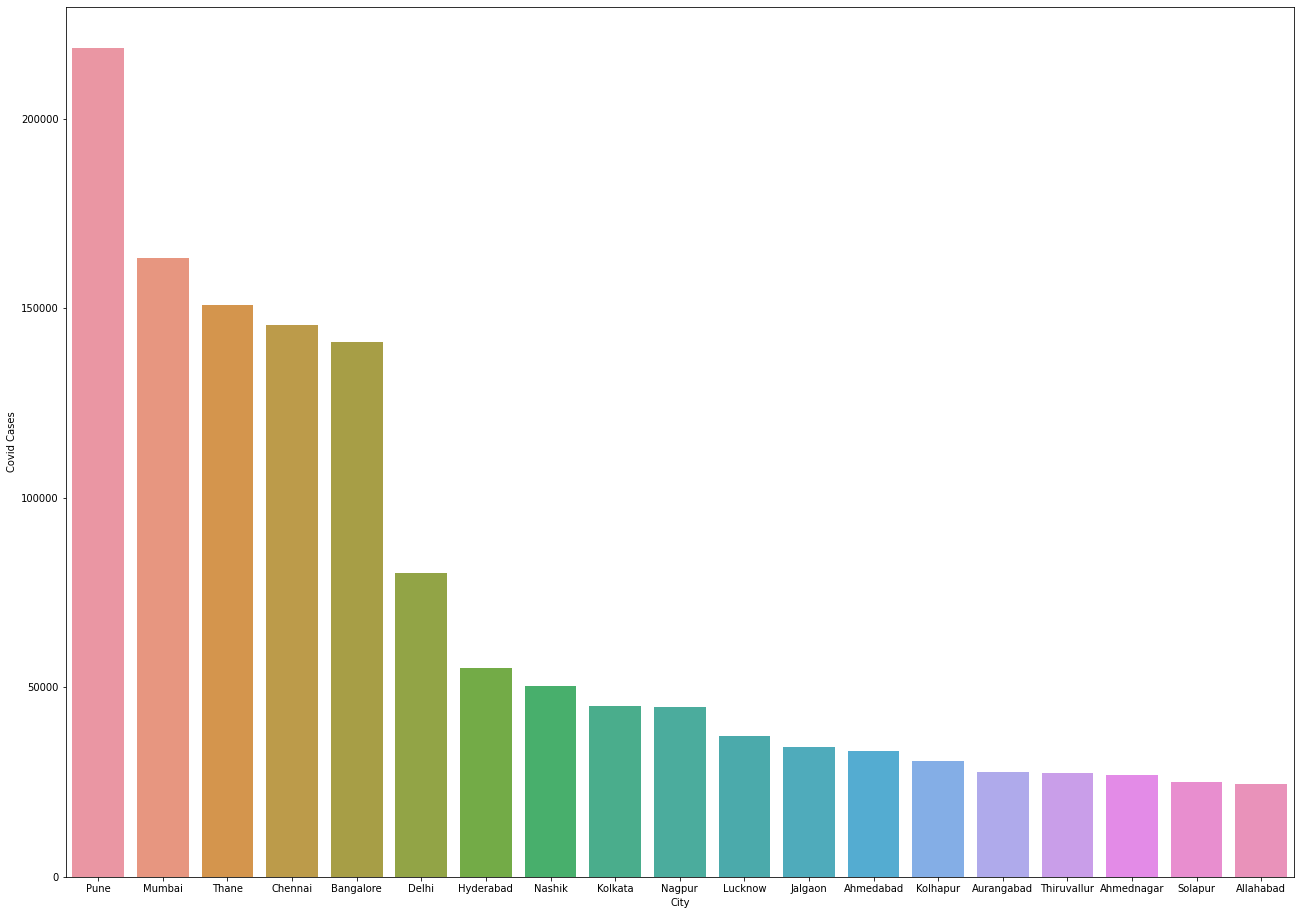

In [96]:
plt.figure(figsize = (22,16))
d=df[["City","Covid Cases"]].sort_values(by="Covid Cases",ascending=False)
sns.barplot(x=d.iloc[0:20,0],y="Covid Cases",data=df)

In [97]:
df.shape

(752, 15)

In [98]:
df["Type"].unique()

array(['M.C', 'MPUA', 'T', 'M', 'C-1T', 'M.Cl', 'M.Corp', 'N.P', 'UA',
       'M.B.', 'N.Pd', 'M.Cl.', 'M.B', 'N.P.P', 'C.T', 'CMC', 'C.M.C',
       'N.P.', 'Nagar Parishad', 'N.A.C', 'MB', 'M Cl', 'M.Corp.', 'U.A',
       'N.P.P.', 'T.C', 'T.M.C', 'N.T', 'C.B', 'NPP', 'T.M.C.', 'NP',
       'Np', 'C.T.', 'T.P', 'N.A', 'T.P.'], dtype=object)

In [99]:
df.replace("T.C.","TC",inplace=True)
df.replace("T.C","TC",inplace=True)
df.replace("M.Cl.","MCl",inplace=True)
df.replace("M.Cl","MCl",inplace=True)
df.replace("N.P.","NP",inplace=True)
df.replace("N.P","NP",inplace=True)
df.replace("G.P.","GP",inplace=True)
df.replace("G.P","GP",inplace=True)
df.replace("C.T.","CT",inplace=True)
df.replace("C.T","CT",inplace=True)
df.replace("T.P","TP",inplace=True)
df.replace("T.P.","TP",inplace=True)
df.replace("N.A.C.","NAC",inplace=True)
df.replace("N.A.C","NAC",inplace=True)
df.replace("T.M.C","TMC",inplace=True)
df.replace("T.M.C.","TMC",inplace=True)
df.replace("M.B.","MB",inplace=True)
df.replace("M.B","MB",inplace=True)
df.replace("M.C.","MC",inplace=True)
df.replace("M.C","MC",inplace=True)
df.replace("N.P.P.","NPP",inplace=True)
df.replace("N.P.P","NPP",inplace=True)
df.replace("I.N.A","INA",inplace=True)
df.replace("N.A","NA",inplace=True)

In [100]:
df.replace("C-1T","CT",inplace=True)
df.replace("C.M.C","CMC",inplace=True)
df.replace("M.Corp.","M.Corp",inplace=True)
df.replace("U.A.","U.A",inplace=True)
df.replace("U.A","UA",inplace=True)
df.replace("Np","NP",inplace=True)
df.replace("C.B","CB",inplace=True)
df.replace("Nagar Parishad","NP",inplace=True)
df.replace("N.T","NT",inplace=True)


In [101]:
t=df["Type"].unique()

In [102]:
sorted(t)

['CB',
 'CMC',
 'CT',
 'M',
 'M Cl',
 'M.Corp',
 'MB',
 'MC',
 'MCl',
 'MPUA',
 'N.Pd',
 'NA',
 'NAC',
 'NP',
 'NPP',
 'NT',
 'T',
 'TC',
 'TMC',
 'TP',
 'UA']

In [103]:
df.isnull().sum()

City                 0
State                0
Type                 0
Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

In [104]:
df.to_csv("train.csv")

In [105]:
# df.drop("City",axis=1,inplace=True)

In [106]:
df2=pd.read_excel("test.xlsx")

In [107]:
df2.head()


,Unnamed: 0,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,0,Tuensang,Nagaland,TC,36774,931,23,10,MEDIUM,94,114.0,0.253390,34237.0,17,2769
1,1,Lakshmeshwar,Karnataka,TMC,36754,934,25,38,HIGH,62,160.0,0.192555,34328.0,13,636502
2,2,Zira,Punjab,MCl,36732,883,29,35,HIGH,63,105.0,0.887882,32434.0,17,242367
3,3,Yawal,Maharashtra,MCl,36706,887,26,31,HIGH,60,174.0,0.407838,32558.0,11,4408916
4,4,Thana Bhawan,Uttar Pradesh,NP,36669,877,28,39,LOW,92,153.0,0.324456,32159.0,23,3104060


In [108]:
df2.isnull().sum()

Unnamed: 0            0
City                  0
State                 0
Type                 19
Population [2011]     0
Sex Ratio             0
Median Age            0
Avg Temp              0
SWM                   0
Toilets Avl           0
Water Purity          0
H Index               0
Female Population     0
# of hospitals        0
Foreign Visitors      0
dtype: int64

In [109]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [110]:
df2.head()

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,TC,36774,931,23,10,MEDIUM,94,114.0,0.253390,34237.0,17,2769
1,Lakshmeshwar,Karnataka,TMC,36754,934,25,38,HIGH,62,160.0,0.192555,34328.0,13,636502
2,Zira,Punjab,MCl,36732,883,29,35,HIGH,63,105.0,0.887882,32434.0,17,242367
3,Yawal,Maharashtra,MCl,36706,887,26,31,HIGH,60,174.0,0.407838,32558.0,11,4408916
4,Thana Bhawan,Uttar Pradesh,NP,36669,877,28,39,LOW,92,153.0,0.324456,32159.0,23,3104060


In [111]:
df.head()
print(df.shape)

(752, 15)


In [112]:
main=pd.concat([df,df2],axis=0)
main.reset_index(inplace=True,drop=True)

In [113]:
final_df=main

In [114]:
final_df.drop("City",axis=1,inplace=True)

In [115]:
final_df.isnull().sum()

State                  0
Type                  19
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity           0
H Index                0
Female Population      0
# of hospitals         0
Foreign Visitors       0
Covid Cases          501
dtype: int64

In [116]:
d=final_df[final_df['Type'].isnull()].index.tolist()
final_df.iloc[d]

,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
802,Jharkhand,NaN,33981.0,892.0,25.0,35.0,HIGH,59.0,174.0,0.657261,30311.0,17.0,167785.0,NaN
809,Bihar,NaN,33738.0,917.0,25.0,28.0,LOW,61.0,197.0,0.061984,30938.0,17.0,923737.0,NaN
815,Bihar,NaN,33490.0,903.0,25.0,34.0,LOW,85.0,199.0,0.996123,30241.0,19.0,923737.0,NaN
818,Jharkhand,NaN,33236.0,897.0,29.0,26.0,HIGH,62.0,175.0,0.101873,29813.0,30.0,167785.0,NaN
833,Bihar,NaN,32526.0,915.0,26.0,38.0,LOW,92.0,134.0,0.178750,29761.0,17.0,923737.0,NaN
863,Bihar,NaN,31432.0,910.0,29.0,27.0,LOW,91.0,129.0,0.715296,28603.0,18.0,923737.0,NaN
883,Bihar,NaN,30109.0,910.0,28.0,25.0,LOW,59.0,106.0,0.692441,27399.0,30.0,923737.0,NaN
884,Bihar,NaN,30082.0,908.0,28.0,38.0,MEDIUM,77.0,161.0,0.767022,27314.0,10.0,923737.0,NaN
990,Bihar,NaN,25811.0,918.0,24.0,34.0,LOW,100.0,134.0,0.560792,23694.0,21.0,923737.0,NaN
1012,Bihar,NaN,24992.0,904.0,29.0,35.0,LOW,88.0,116.0,0.381656,22593.0,25.0,923737.0,NaN


In [117]:
final_df["Type"].fillna("NA",inplace=True)

In [118]:
final_df.isnull().sum()

State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity           0
H Index                0
Female Population      0
# of hospitals         0
Foreign Visitors       0
Covid Cases          501
dtype: int64

In [119]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [120]:
final_df=category_onehot_multcols(["Type","State","SWM"])



Type
State
SWM


In [121]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Population [2011]       1253 non-null   float64
 1   Sex Ratio               1253 non-null   float64
 2   Median Age              1253 non-null   float64
 3   Avg Temp                1253 non-null   float64
 4   Toilets Avl             1253 non-null   float64
 5   Water Purity            1253 non-null   float64
 6   H Index                 1253 non-null   float64
 7   Female Population       1253 non-null   float64
 8   # of hospitals          1253 non-null   float64
 9   Foreign Visitors        1253 non-null   float64
 10  Covid Cases             752 non-null    float64
 11  CMC                     1253 non-null   uint8  
 12  CT                      1253 non-null   uint8  
 13  GP                      1253 non-null   uint8  
 14  INA                     1253 non-null   

In [122]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [123]:
final_df.shape

(1253, 70)

In [124]:
df_Train=final_df.iloc[:752,:]
df_Test=final_df.iloc[752:,:]

In [125]:
df_Test.shape

(501, 70)

In [126]:
df_Test.drop(['Covid Cases'],axis=1,inplace=True)


/home/abilash/AI/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
X_train=df_Train.drop(['Covid Cases'],axis=1)
y_train=df_Train['Covid Cases']

In [128]:
# df_Train.to_csv("pycaret.csv")

In [129]:
X_train

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,LOW,MEDIUM
0,12442373.0,878.0,23.0,32.0,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,...,0,0,0,0,0,0,0,0,0,1
1,11007835.0,858.0,27.0,30.0,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,...,0,0,0,0,0,0,0,0,0,1
2,8436675.0,936.0,28.0,37.0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,...,0,0,0,0,0,0,0,0,0,0
3,6809970.0,930.0,23.0,31.0,217.0,118.0,0.827744,6333272.0,110.0,126078.0,...,0,0,0,1,0,0,0,0,0,1
4,5570585.0,852.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,36954.0,846.0,23.0,28.0,68.0,103.0,0.035280,31263.0,19.0,284973.0,...,0,0,0,0,0,0,0,0,0,1
748,36947.0,945.0,23.0,36.0,62.0,136.0,0.056394,34915.0,22.0,1489500.0,...,0,0,0,0,0,0,0,1,0,1
749,36828.0,1019.0,28.0,28.0,98.0,138.0,0.066752,37528.0,27.0,106153.0,...,0,0,0,0,0,0,0,0,0,0
750,36805.0,900.0,24.0,6.0,63.0,145.0,0.627556,33125.0,15.0,24720.0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
from sklearn import metrics 

from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train,y_train)
y_pred_randomforest = rfregressor.predict(df_Test)

In [165]:
y_pred_randomforest=y_pred_randomforest.astype("int64")

In [166]:
pred=pd.DataFrame(y_pred_randomforest)
sub_df=pd.read_excel('Test_dataset.xlsx')
sub_df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Foreign Visitors.1
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0,NaN
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0,NaN
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0,NaN
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0,NaN
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0,NaN


In [167]:
datasets=pd.concat([sub_df['City'],pred],axis=1)
datasets.columns=['City',"Covid Cases"]


In [169]:
datasets

,City,Covid Cases
0,Tuensang,2163
1,Lakshmeshwar,2311
2,Zira,2663
3,Yawal,2179
4,Thana Bhawan,2434
...,...,...
496,Nandaprayag,2483
497,Kirtinagar,2145
498,Kedarnath,2421
499,Gangotri,2486


In [170]:
datasets.to_excel('Test_dataset.xlsx',index=False)